<a href="https://colab.research.google.com/github/johnjustine5646/RNN_LSTM_Lab8/blob/main/John_522_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 1. Implement the Weather Prediction using RNN and LSTM.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:

df = pd.read_csv('/content/seattle-weather (1).csv')

In [3]:

df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [5]:

df.duplicated().sum()

0

In [6]:

training_set = df.iloc[:,2:3].values
training_set

array([[12.8],
       [10.6],
       [11.7],
       ...,
       [ 7.2],
       [ 5.6],
       [ 5.6]])

In [7]:
len(training_set)

1461

In [8]:

def df_to_XY(df,window_size=10):
 X_train=[]
 y_train=[]

 for i in range(10,len(training_set)):
    X_train.append(training_set[i-10:i,0])
    y_train.append(training_set[i,0])

 X_train, y_train = np.array(X_train), np.array(y_train)
 return X_train, y_train

In [9]:

WINDOW = 10
X,y = df_to_XY(df,WINDOW)
print(len(X),len(y))
X_train = X[:800]
y_train = y[:800]
X_val = X[800:1000]
y_val = y[800:1000]
X_test = X[1000:]
x_test = y[1000:]

1451 1451


In [10]:

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))


## Building the RNN

In [11]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [12]:

regressor = Sequential()


## Adding the first LSTM layer and some Dropout regularisation

In [13]:

regressor.add(LSTM(units=50, return_sequences = True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#Output layer
regressor.add(Dense(units=1))

In [14]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [15]:

from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

## Fitting the RNN to the training set

In [16]:
history=regressor.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100, batch_size=32)

Epoch 1/100
25/25 [==============================] - 16s 163ms/step - loss: 208.0506 - val_loss: 243.1684
Epoch 2/100
25/25 [==============================] - 0s 19ms/step - loss: 92.1709 - val_loss: 165.1879
Epoch 3/100
25/25 [==============================] - 1s 20ms/step - loss: 71.2639 - val_loss: 135.7677
Epoch 4/100
25/25 [==============================] - 1s 25ms/step - loss: 63.0064 - val_loss: 117.2040
Epoch 5/100
25/25 [==============================] - 1s 34ms/step - loss: 59.5950 - val_loss: 104.1516
Epoch 6/100
25/25 [==============================] - 1s 31ms/step - loss: 56.2428 - val_loss: 95.1742
Epoch 7/100
25/25 [==============================] - 1s 32ms/step - loss: 54.6733 - val_loss: 88.1671
Epoch 8/100
25/25 [==============================] - 0s 20ms/step - loss: 54.9819 - val_loss: 84.3837
Epoch 9/100
25/25 [==============================] - 1s 20ms/step - loss: 54.8867 - val_loss: 80.9349
Epoch 10/100
25/25 [==============================] - 0s 20ms/step - loss:

In [17]:
his = pd.DataFrame(history.history)

In [18]:
his.head()


,loss,val_loss
0,208.050598,243.168396
1,92.170891,165.187866
2,71.263939,135.767715
3,63.006367,117.204033
4,59.595036,104.151619


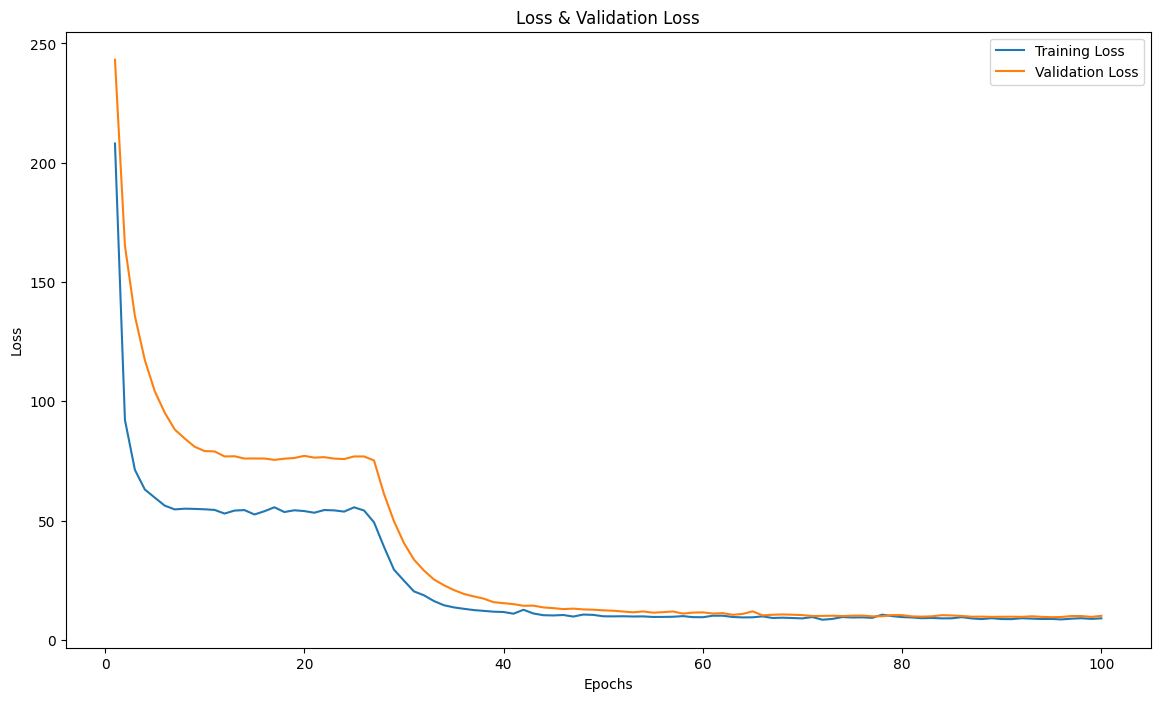

In [19]:

import seaborn as sns

fig, ax = plt.subplots(figsize=(14, 8))
plt.title("Loss & Validation Loss")

epochs = range(1, len(history.history['loss']) + 1)

sns.lineplot(x=epochs, y=history.history['loss'], label='Training Loss', ax=ax)
sns.lineplot(x=epochs, y=history.history['val_loss'], label='Validation Loss', ax=ax)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:

train_pred = regressor.predict(X_train).flatten()
val_pred = regressor.predict(X_val).flatten()
test_pred = regressor.predict(X_test).flatten()

15/15 [==============================] - 0s 10ms/step


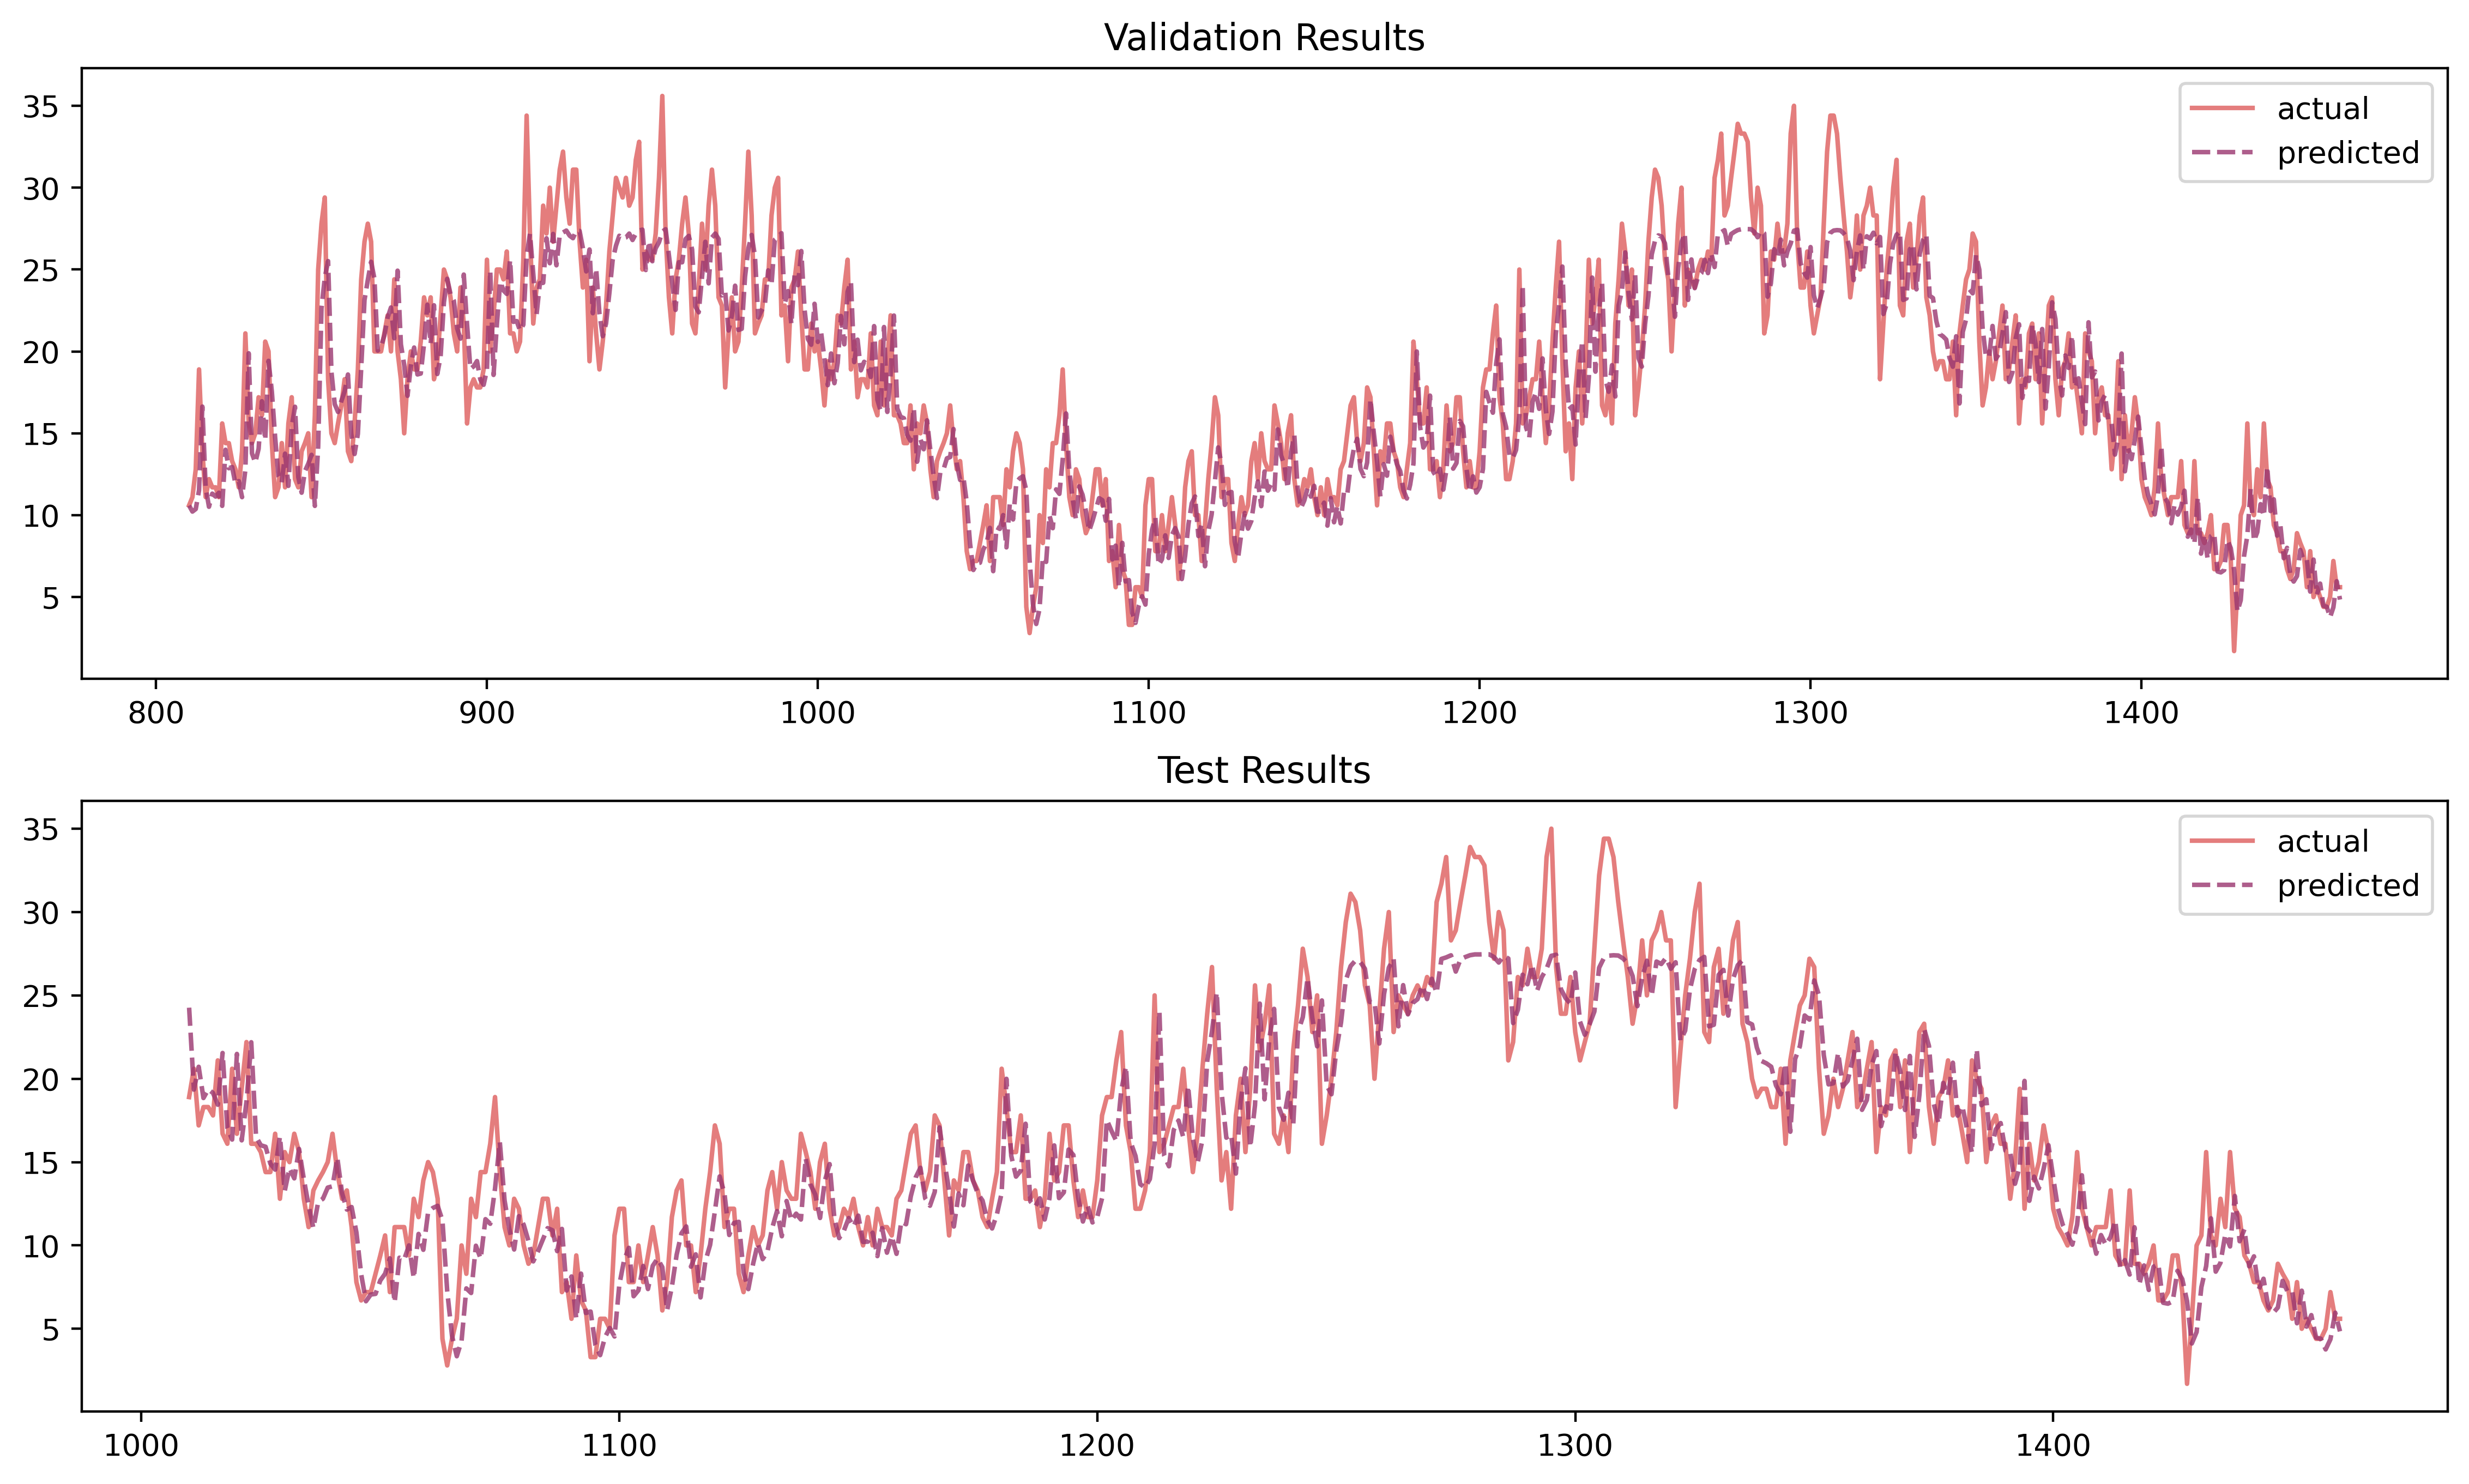

In [21]:

pred = np.concatenate([train_pred,val_pred,test_pred])
df_pred = pd.DataFrame(df["temp_max"].copy())
df_pred.columns=["actual"]
df_pred = df_pred[WINDOW:]
df_pred["predicted"] = pred

fig,axes = plt.subplots(2,1,figsize=(14,8),dpi=400)

plt.subplot(2,1,1)
plt.title("Validation Results")
sns.lineplot(df_pred[800:],alpha=0.8,palette="flare",linestyle=None);

plt.subplot(2,1,2)
plt.title("Test Results")
sns.lineplot(df_pred[1000:],alpha=0.8,palette="flare",linestyle=None);


## 2. Implement the Machine Translation using code

In [23]:
from transformers import MarianMTModel, MarianTokenizer

model_name = "Helsinki-NLP/opus-mt-en-fr"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

input_text = "Hi, my name is John."

inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True)

translated = model.generate(**inputs)

translated_text = tokenizer.decode(translated[0], skip_special_tokens=True)

print("Translated text:", translated_text)

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Translated text: Bonjour, je m'appelle John.
